<a href="https://colab.research.google.com/github/harnalashok/exercises/blob/main/bank_customer_churn_analysis_shekhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

**Loading the dataset

In [4]:
cp = pd.read_csv("Churn_Modelling.csv")

In [3]:
cp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Total No. of columns are 14
No Null values exist in any of the column

In [4]:
columns = cp.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


##**Not all columns affect the customer churn

Column Description:

RowNumber - corresponds to the record (row) number and has no effect on the output.

CustomerId— contains random values and has no effect on customer leaving the bank. However, it is unique identifier hence we will keep this column and can drop it before EDA.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer's location can affect their decision to leave the bank.

Gender— Using this we can analyse if gender is important factor to predict the customer leaving the bank

Age— Age is relevant, since older customers are less likely to leave their bank than younger ones.

Tenure— Number of years that the customer has been a client of the bank. Normally, older customers are more loyal and less likely to leave a bank.

Balance— Good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts— Number of products that a customer has purchased through the bank.

HasCrCard— Whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—People with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited— Whether or not the customer left the bank

Based on the above observations of the column features, We will remove the RowNumber and Surname column as they have no impact on the output. All remaining columns do contribute to the customer churn in one way or another

In [5]:
cp.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [ ]:
cp.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Univariate Variable Analysis

**Categorical variable :

Geography
Gender
NumOfProducts
HasCrCard
IsActiveMember
Exited


**Numerical variable:

CustomerId
CreditScore
Age
Tenure
Balance
EstimatedSalary


In [ ]:
def plot_bar(variable):
    
    var=cp[variable]
    varValue= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [7]:
# Define two general functions to annotate plots with percentages:
# See StackOverflow: https://stackoverflow.com/a/62053049

def with_hue(plot, feature, Number_of_levels, hue_levels):
    """
    Number_of_levels: No of levels in main feature
    hue_levels: No of levels in hue feature
    """
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_levels):
        total = feature.value_counts().values[i]
        for j in range(hue_levels):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_levels + i)]/total)
            x = patch[(j*Number_of_levels + i)].get_x() + patch[(j*Number_of_levels + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_levels + i)].get_y() + patch[(j*Number_of_levels + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

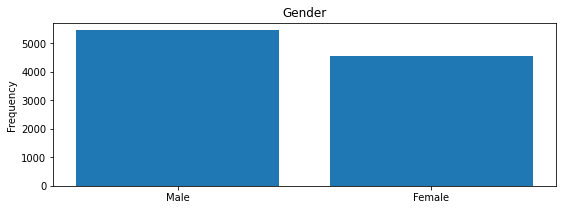

Gender: 
 Male      5457
Female    4543
Name: Gender, dtype: int64


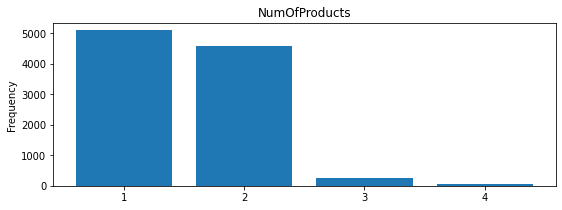

NumOfProducts: 
 1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


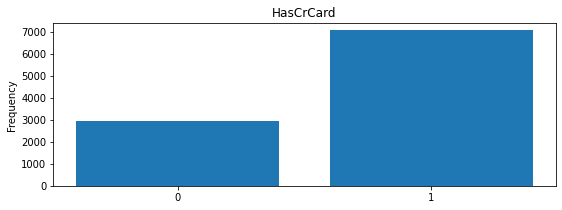

HasCrCard: 
 1    7055
0    2945
Name: HasCrCard, dtype: int64


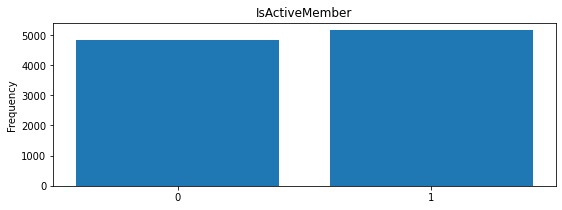

IsActiveMember: 
 1    5151
0    4849
Name: IsActiveMember, dtype: int64


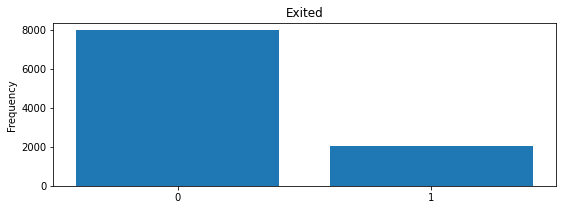

Exited: 
 0    7963
1    2037
Name: Exited, dtype: int64


In [ ]:
category1=["Gender","NumOfProducts","HasCrCard","IsActiveMember","Exited"]
for c in category1:
    plot_bar(c)

#### In this dataset, the number of male customers is slightly higher than the number of female customers

#### The number of customers using 3 or 4 products is very low.

#### The number of customers who have a credit card is almost 2.5 times the number of customers without a credit card, so the number of customers who use the bank's credit card is around 70% of all customers.

#### The number of active customers is higher than inactive customers, but there is no obvious difference, their values are close to each other.

#### Too many customers leaving the bank, around 80% of all customers left the bank.


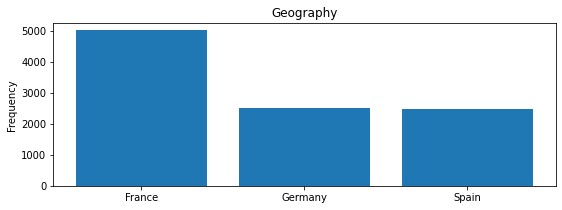

Geography: 
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [ ]:
category2=["Geography"]
for c in category2:
    plot_bar(c)

**50% of the customers are in France, around 25% in Germany, and around 24% in Spain.

## Numerical Variables

In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(cp[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

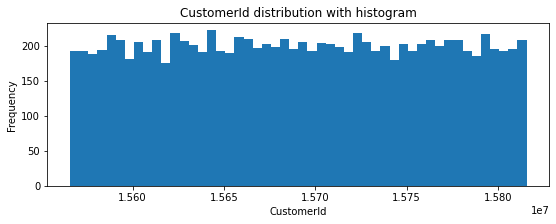

In [ ]:
numerical1=["CustomerId"]
for n in numerical1:
    plot_hist(n)

**Since the CustomerId variable is not meaningful numeric variables. We should not include it in analysis.

In [ ]:
cp.drop(['CustomerId'], axis=1, inplace=True)

In [ ]:
cp.shape

(10000, 11)

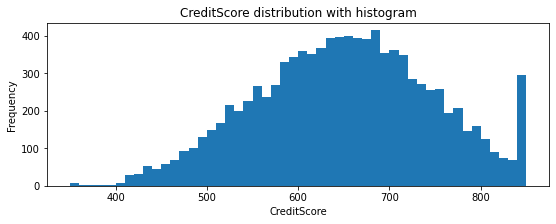

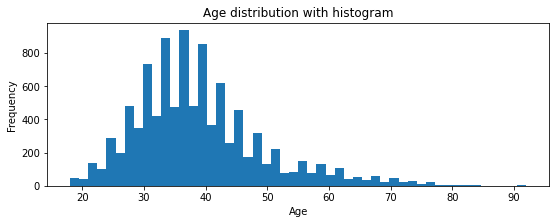

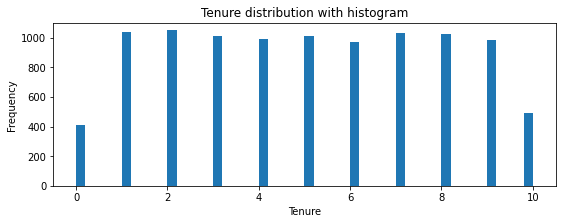

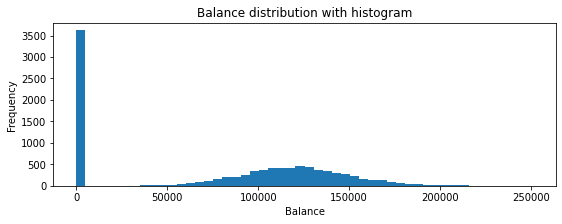

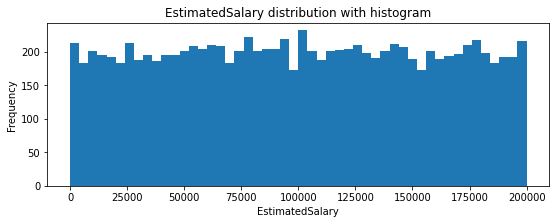

In [ ]:
numerical2=["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
for n in numerical2:
    plot_hist(n)

In [ ]:
cp.CreditScore.mean()

650.5288

# CreditScore variable

**Few customers have less than 600 credit points.

**The majority of its customers have a credit score of more than 600.

**The mean of the credit score is 650.

**As seen in the chart, the number of customers with a credit score less than 600 is small, after 600 the number of customers has increased, so we can say that there is a distorted distribution to the left.

**The number of customers with a credit score of more than 800 increased at one point.

In [ ]:
cp.Age.mean()

38.9218

# Age variable:

**Fewer customers are over the age of 45. 

**There are even fewer customers in the age group of 60 to 80 

**There are very few customers who are around 90 years old, where it can be outlier.

**We can say that there is a skewed distribution to the right because there is a significant decrease in the number of customers older than the average age i.e. 38.92

# Tenure variable

**Clearly shows there are 11 categories in length of relationship

In [ ]:
print(cp.Balance.max())
print(cp.Balance.min())
print(cp.Balance.mean())
print(cp.Balance.std())

250898.09
0.0
76485.88928799961
62397.40520238623


# Balance variable

**The number of customers with a balance status of 0 is too high.

**There was an increase between 50,000 and 100,000, and then it decreased.

**The standard deviation is high, that is, the balance variable is heterogeneously distributed.

**There is a gap between the customers in terms of balance maintained by the customer
(as can be seen from the max and min values).

In [ ]:
print(cp.EstimatedSalary.max())
print(cp.EstimatedSalary.min())
print(cp.EstimatedSalary.mean())
print(cp.EstimatedSalary.std())

199992.48
11.58
100090.2398809998
57510.49281769822


# EstimatedSalary variable

**There is a heterogeneous distribution in estimated salaries, customers' salaries differ, 
but there is no obvious difference in the number of customers who receive the same salary.

# EDA

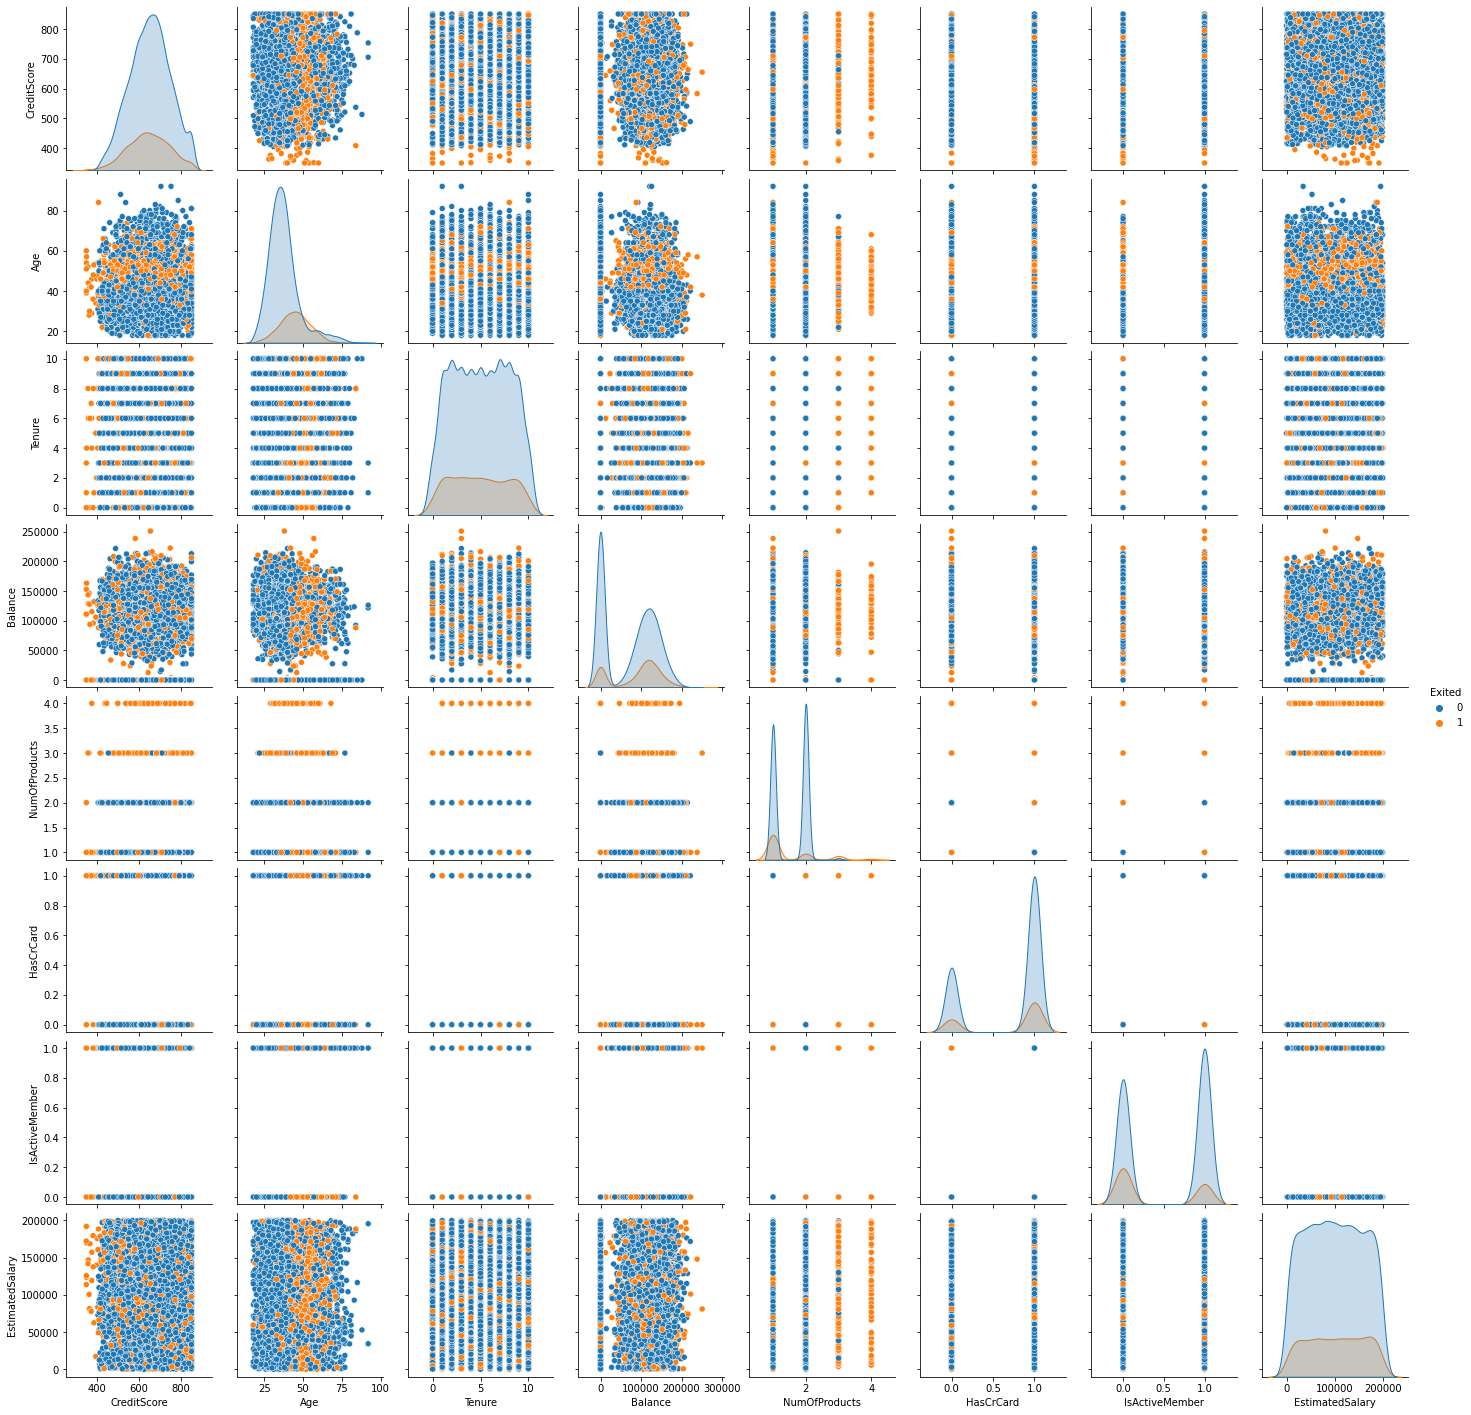

In [ ]:
sns.pairplot(cp, hue = 'Exited')

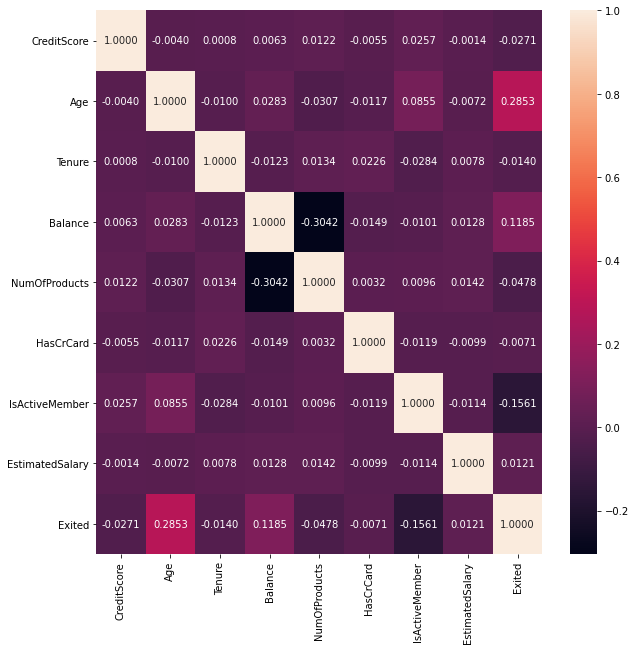

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cp.corr(),annot=True,fmt= ".4f",ax=ax)
plt.show()

#### The above data says the Age, Balance, and Estimated Salary positively correlates with Exited which means with increase in their value probability of exited being 1 is more

#### whereas  creditscore,Tenure, NumofProducts, HsCrCard, isACtive member negatively correlates with Exited which means that increase in the values of these variables reduces the chances of exiting

In [ ]:
cp[["Age","Exited"]].groupby(["Exited"],as_index=False).mean().sort_values(by="Age",ascending=False)

,Exited,Age
1,1,44.837997
0,0,37.408389


#### The average age of those who left is 44.8 while the average age of those who did not leave is 37.4. So the age of the people who leave is generally higher.

In [ ]:
cp[["IsActiveMember","Exited"]].groupby(["IsActiveMember"],as_index=False).mean().sort_values(by="IsActiveMember",
                                                                                              ascending=False)

,IsActiveMember,Exited
1,1,0.142691
0,0,0.268509


#### 14% of active members and 26% of inactive members left the bank.

In [ ]:
cp[["NumOfProducts","Exited"]].groupby(["NumOfProducts"],as_index=False).mean().sort_values(by="NumOfProducts",ascending=False)

,NumOfProducts,Exited
3,4,1.000000
2,3,0.827068
1,2,0.075817
0,1,0.277144


#### Customers with 1 or 2 products are more likely to churn

<AxesSubplot:xlabel='Geography', ylabel='count'>

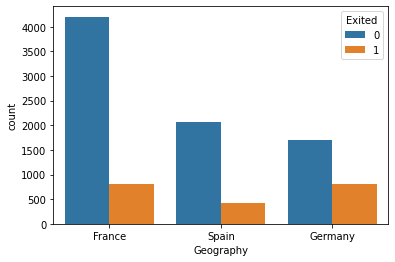

In [ ]:
sns.countplot(x="Geography",hue="Exited",data=cp)

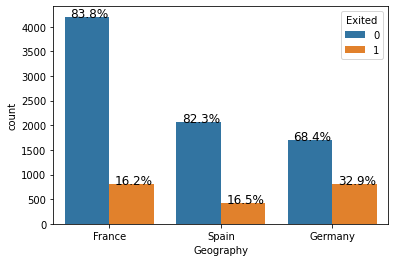

In [14]:
ax = sns.countplot(x="Geography",hue="Exited",data=cp)
with_hue(ax, cp.Geography, 3,2)

In the above graph, you one can compare bar-heights of all bars in the whole of frame. But the following helps better comparison of adjacent (dodged) bars.

In [16]:
# Helps in comparing two adjacent bars
def percent_graph(grby,hue, data):
  so = data.groupby(grby)[hue].value_counts(normalize = True)
  so.name = '%count'
  t = so.reset_index()
  sns.set_theme(style="whitegrid")
  sns.barplot(x = grby, y = '%count', hue= hue, data= t)

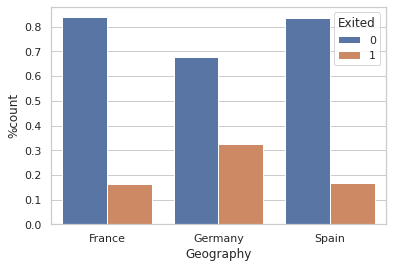

In [17]:
# Bar height of two bars of Spain clearly reflect %cent differences.
# So also for France and for Germany
percent_graph('Geography', 'Exited', cp)

#### In France, Spanin and Germany, the number of customers who have not left is much higher than those who have exited, but the biggest difference between exited and not existed is in France.

<AxesSubplot:xlabel='Gender', ylabel='count'>

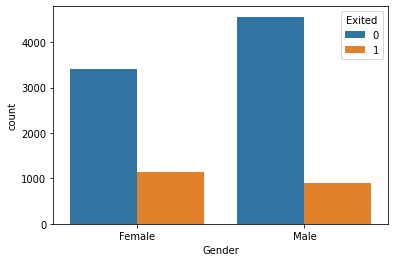

In [ ]:
sns.countplot(x="Gender",hue="Exited",data=cp)

#### Female customers are more likely to churn than male customers

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

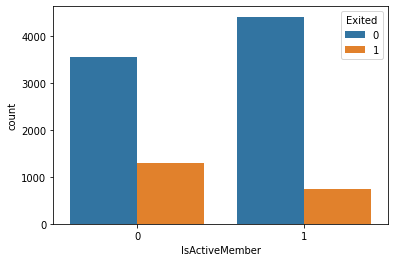

In [ ]:
sns.countplot(x="IsActiveMember",hue="Exited",data=cp)

#### Inactive customers are more likely to churn

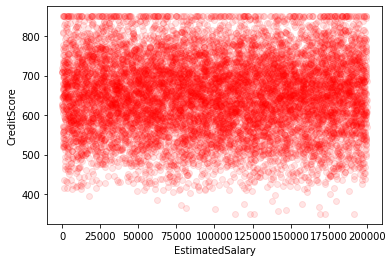

In [ ]:
plt.scatter(cp.EstimatedSalary,cp.CreditScore,alpha=0.1,color="r")
plt.xlabel("EstimatedSalary")
plt.ylabel("CreditScore")
plt.show()

#### People with high salaries rarely have a low credit score.Usually there is a people density between 500 and 700 credit points

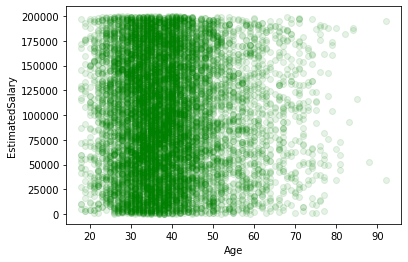

In [ ]:
plt.scatter(cp.Age,cp.EstimatedSalary,alpha=0.1,color="g")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

#### The density of people between the ages of 26-42 is high. Few Older people at the age of 80 also have a high salary

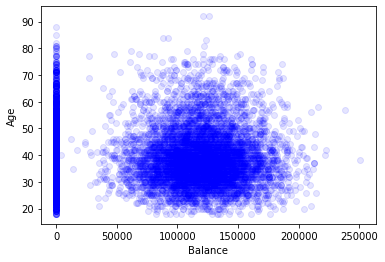

In [ ]:
plt.scatter(cp.Balance,cp.Age,alpha=0.1,color="b")
plt.xlabel("Balance")
plt.ylabel("Age")
plt.show()

#### Balance values of people between the ages of 26-42 are between 60000-170000

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

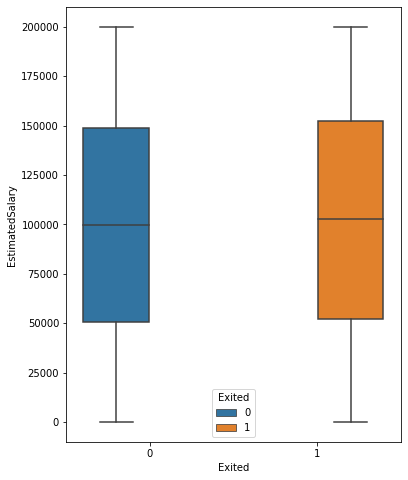

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Exited', y='EstimatedSalary', hue = "Exited", data=cp)

#### Difference in estimated salary of exited and not existed customer is not visible

<AxesSubplot:xlabel='Exited', ylabel='Age'>

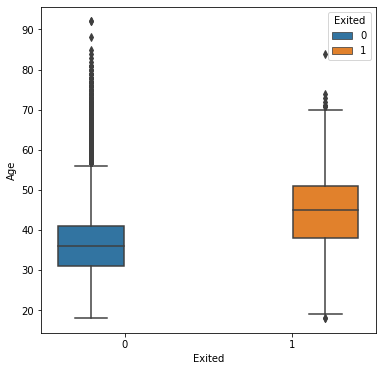

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Exited', y='Age',hue = "Exited", data=cp)

#### More churn is visbile in the age group of 40 to 50

In [ ]:
cp['Age'].min(), cp['Age'].max()

(18, 92)

In [ ]:
cp['AgeGrp'] = pd.cut(cp['Age'],
                     bins=[18,30,50,65,99], labels=['18-30','31-50', '51-65','Above65'])

In [ ]:
cp['AgeGrp'].value_counts()

31-50      6771
18-30      1946
51-65       997
Above65     264
Name: AgeGrp, dtype: int64

<AxesSubplot:xlabel='AgeGrp', ylabel='count'>

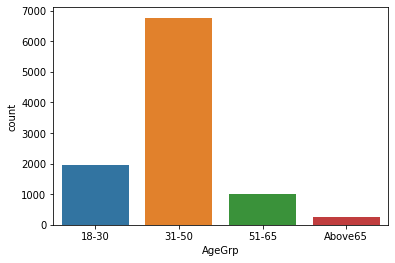

In [ ]:
sns.countplot(x='AgeGrp', data=cp)

<AxesSubplot:xlabel='AgeGrp'>

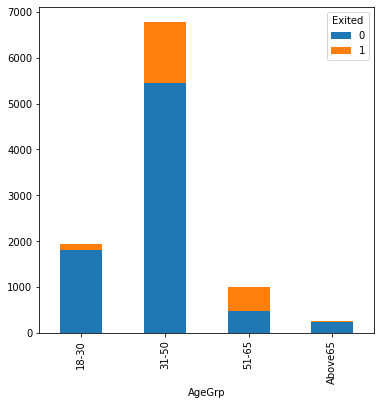

In [ ]:
pd.crosstab(cp['AgeGrp'], cp['Exited']).plot(kind='bar', stacked=True, figsize=(6,6))

#### Data showing rate of customer exit is higher in the age group of 31 to 50 years

Text(0.5, 1.0, 'CHURN vs BALANCE')

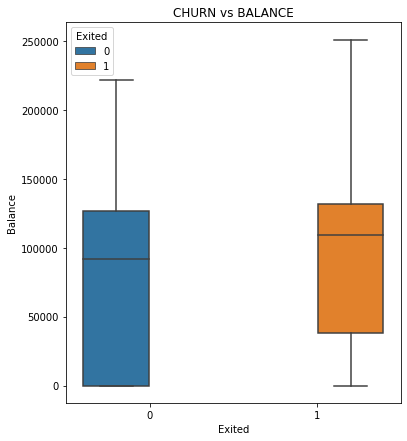

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(x='Exited', y='Balance',hue ="Exited", data=cp)
plt.title('CHURN vs BALANCE')

#### Customers who are maintaining low balance are also likely to churn

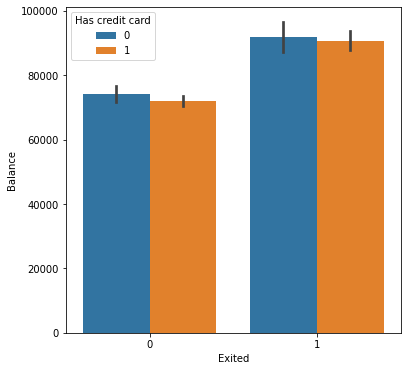

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='Exited', y='Balance', hue='HasCrCard', data=cp)
plt.legend(title = 'Has credit card', loc=0)

#### Above graph shows variation of balance for credit card holders/non holders by exited and retained customers

Text(0.5, 1.0, 'CHURN vs NUMBER OF PRODUCTS TAKEN')

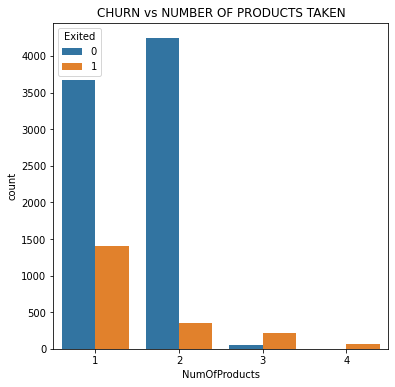

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=cp)
plt.title('CHURN vs NUMBER OF PRODUCTS TAKEN')

#### Customers with low number of products shows higher churning ratio

<AxesSubplot:xlabel='IsActiveMember'>

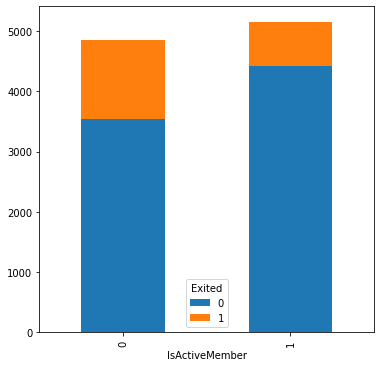

In [ ]:
pd.crosstab(cp['IsActiveMember'], cp['Exited']).plot(kind='bar', stacked=True, figsize=(6,6))

#### Inactive customers are more likely to churn